# CSCI180 HW2

In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from IPython.display import display


In [89]:
# 1.  Load the dataset into a pandas dataframe and find the data types for each
# column in the dataset.
housing_df = pd.read_csv('housing.csv')
display(housing_df)

print("data types for each column")
housing_df.dtypes

# it seems like all columns except the last are numerical features, 
# and the last column is categorical feature

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

data types for each column


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [90]:
# 2. Find the names of the columns of this dataframe.
print("column names: ")
housing_df.columns

column names: 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [91]:
# 4. Find the correlation matrix for this dataset. Report which features tend to have a
# high correlation with the target variable. (You can use the corr() function). Refer
# to supplementary slide ‘Correlation’.

display(housing_df.corr(method='pearson', min_periods=1, numeric_only=True))
print('''I find high corr between the following pairs:
corr(longitude, latitude) = -0.924664 but I think this is because of the geographic location of california

corr(total_rooms, total_bedrooms) = 0.930380
corr(total_rooms, population) = 0.857126
corr(total_rooms, households) = 0.918484

corr(total_bedrooms, population) = 0.877747
corr(total_bedrooms, households) = 0.979728

corr(population, households) = 0.907222
''')


longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

I find high corr between the following pairs:
corr(longitude, latitude) = -0.924664 but I think this is because of the geographic location of california

corr(total_rooms, total_bedrooms) = 0.930380
corr(total_rooms, population) = 0.857126
corr(total_rooms, households) = 0.918484

corr(total_bedrooms, population) = 0.877747
corr(total_bedrooms, households) = 0.979728

corr(population, households) = 0.907222



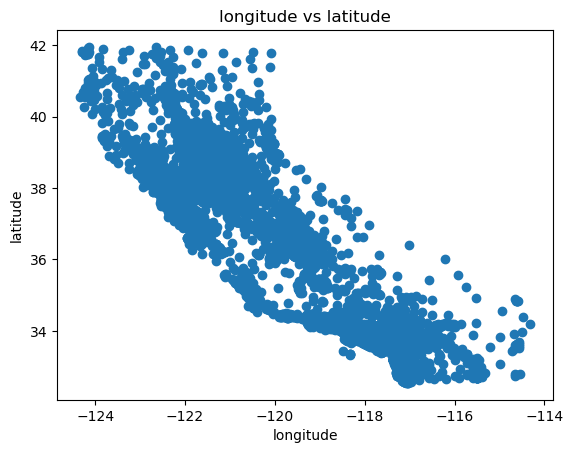

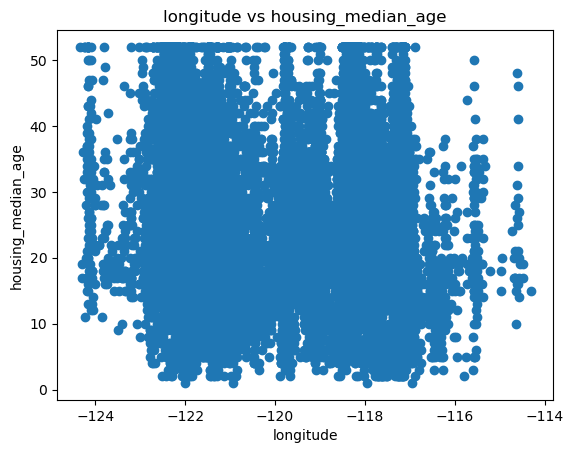

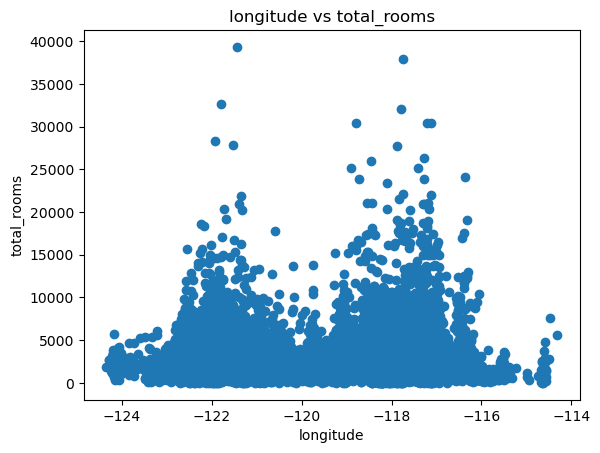

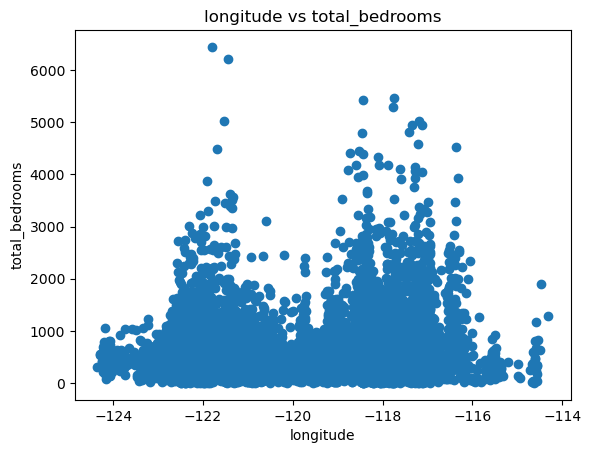

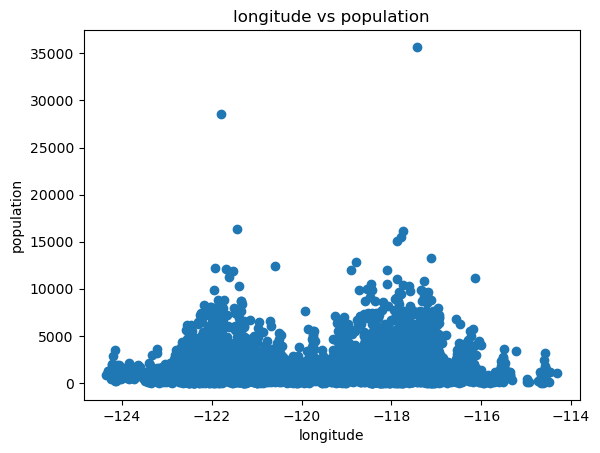

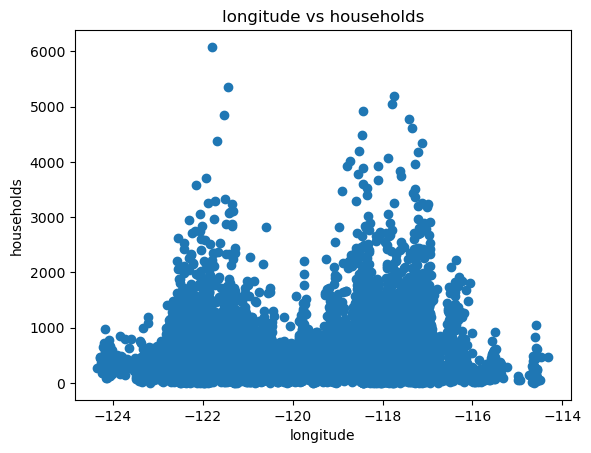

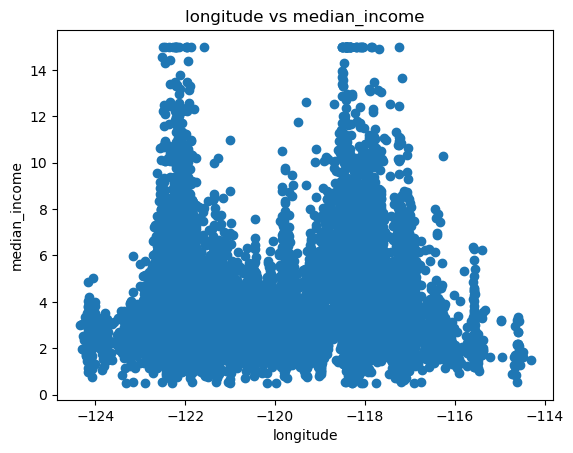

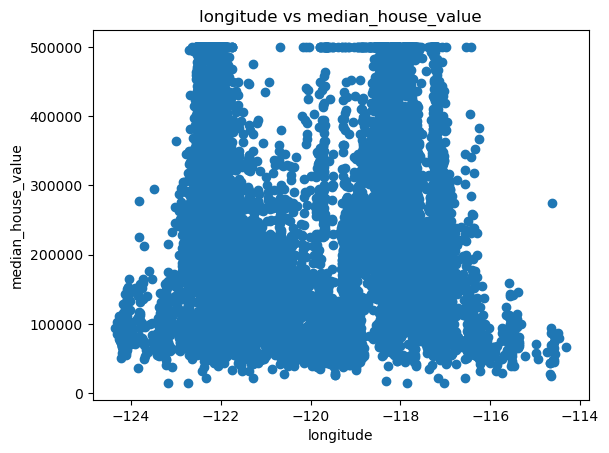

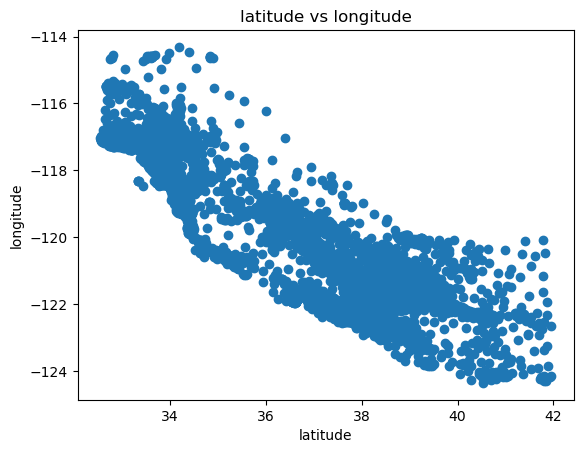

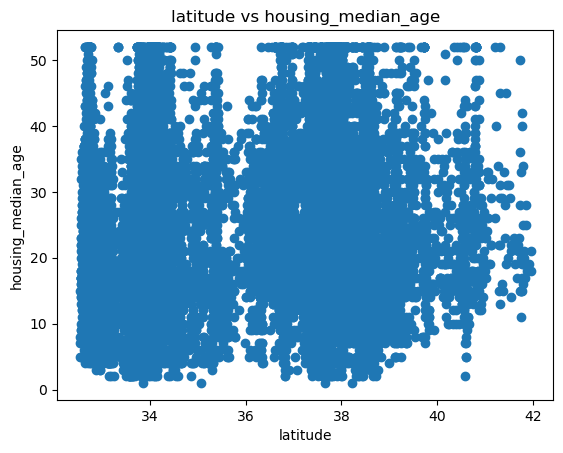

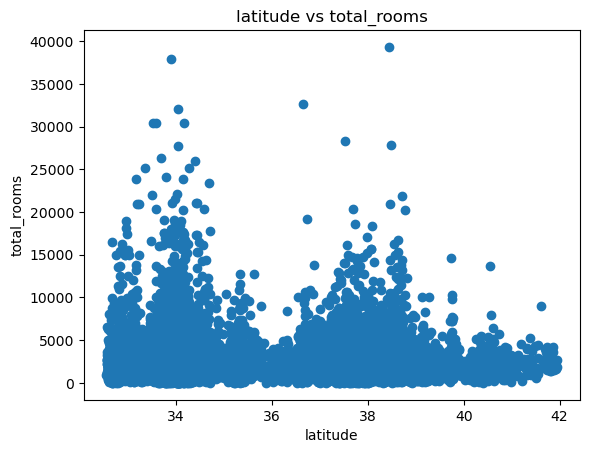

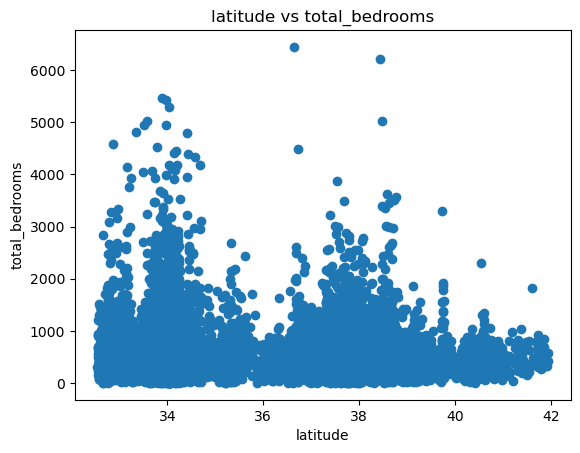

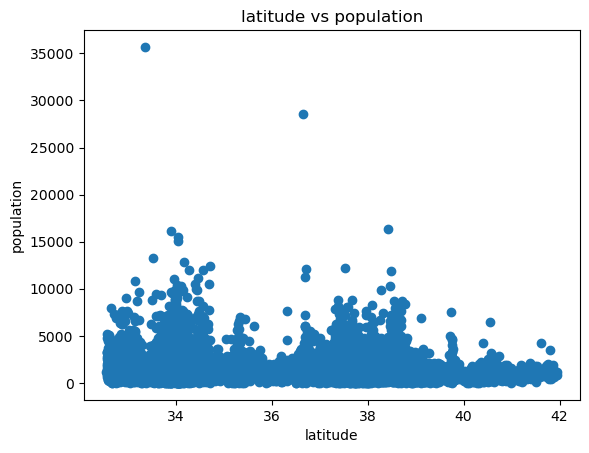

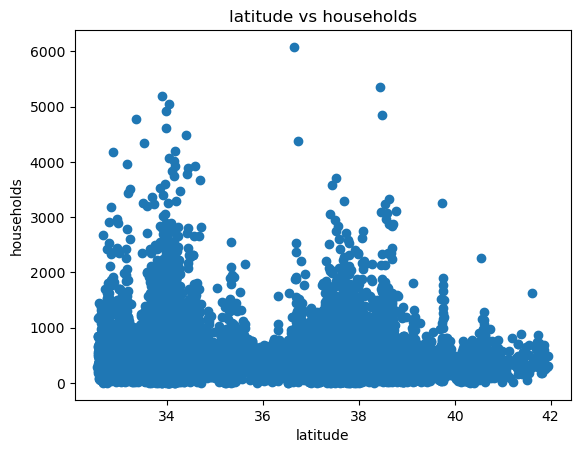

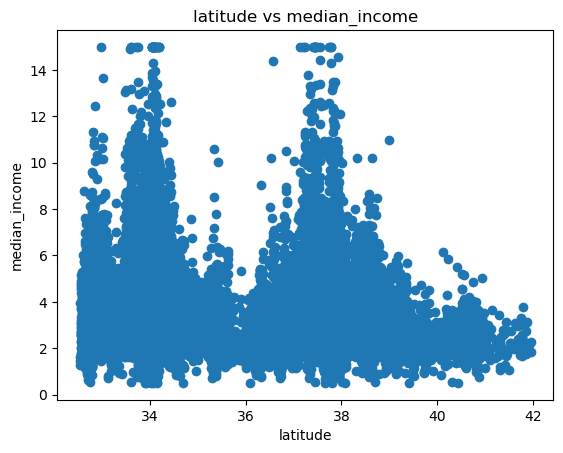

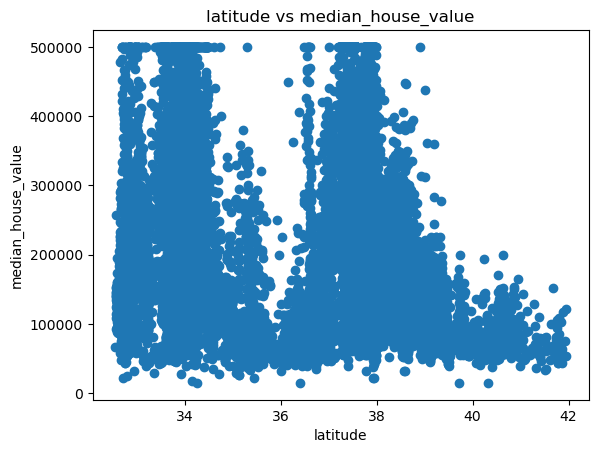

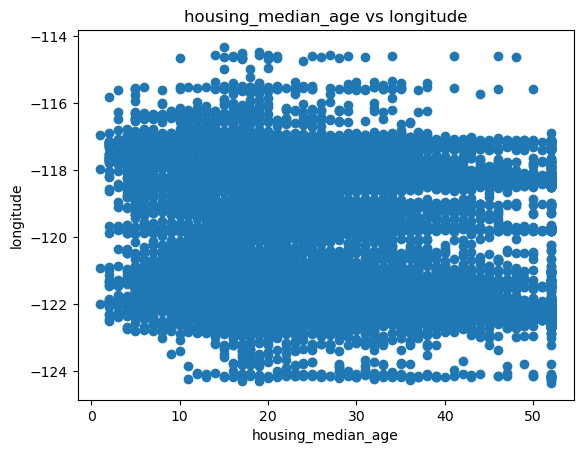

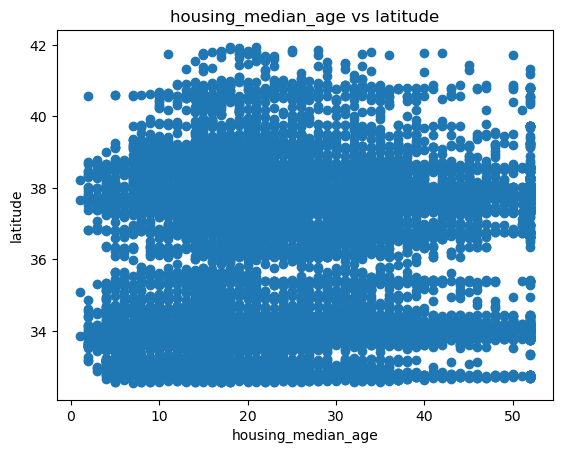

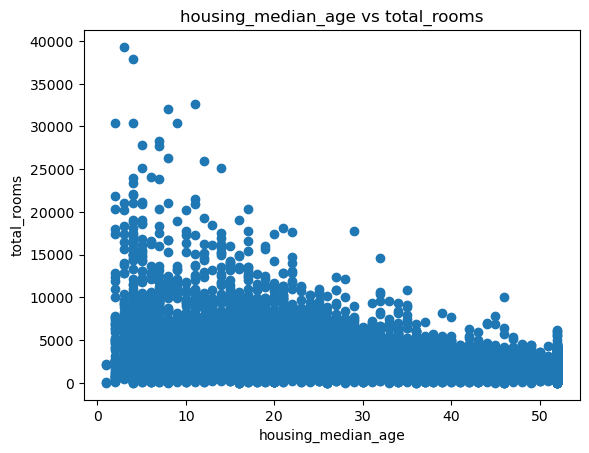

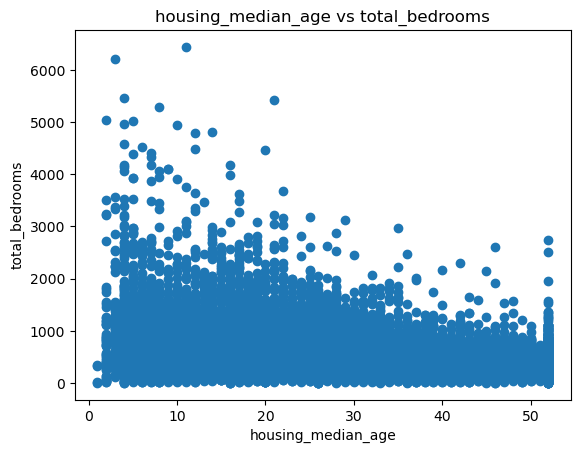

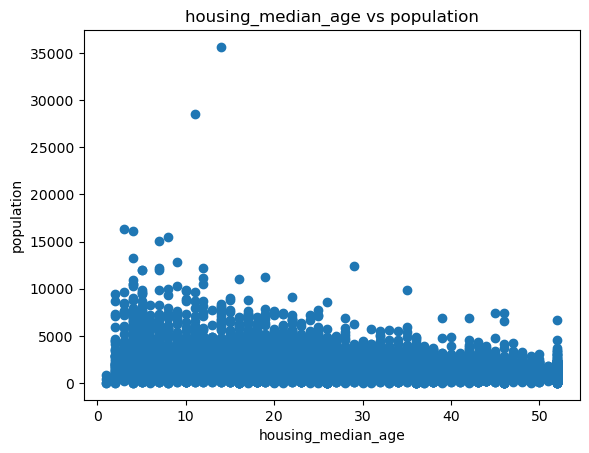

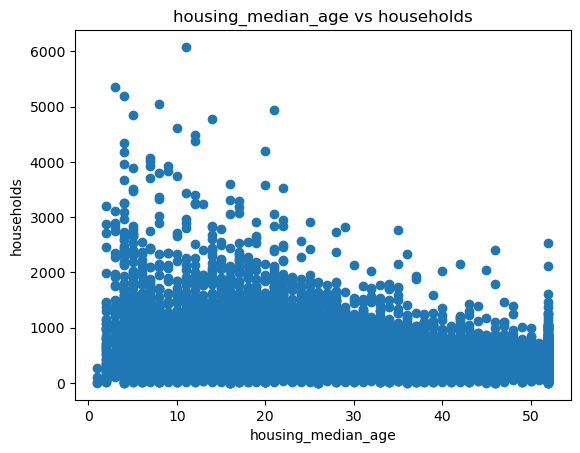

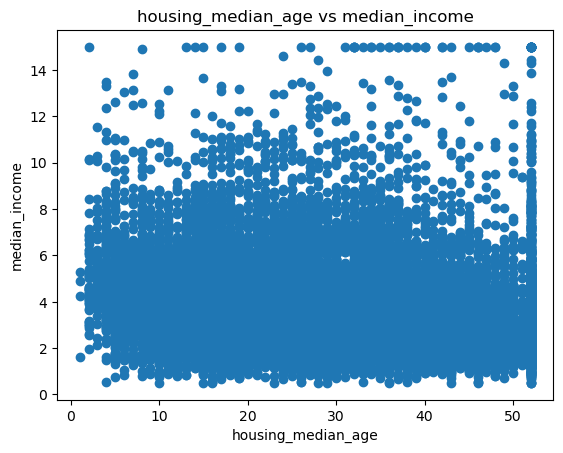

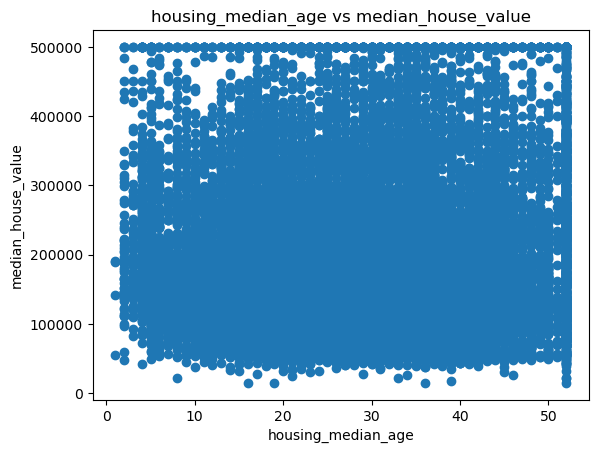

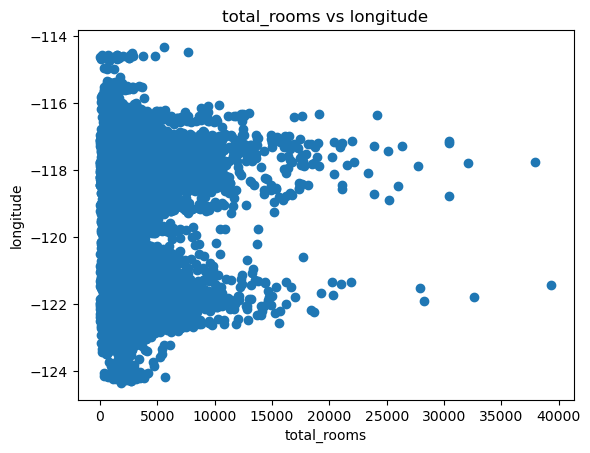

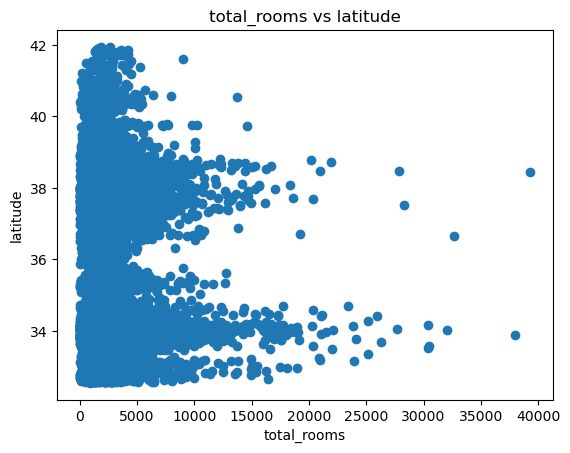

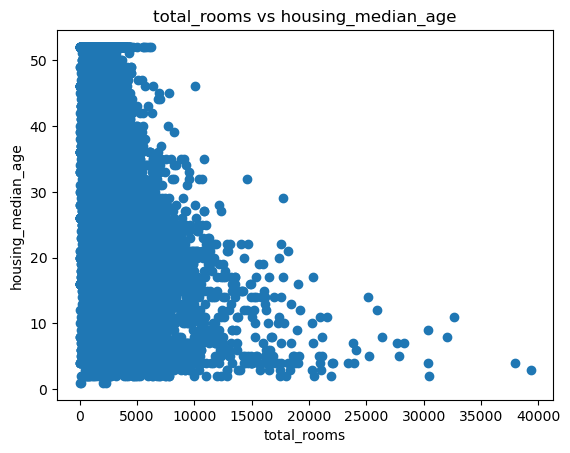

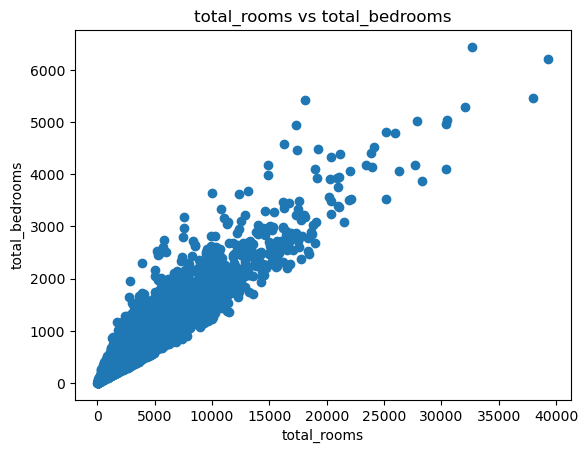

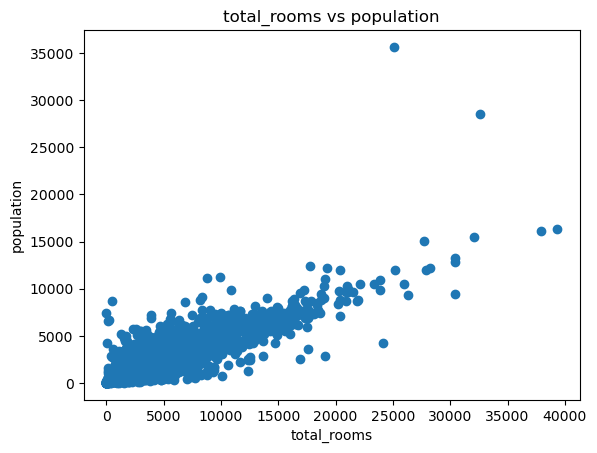

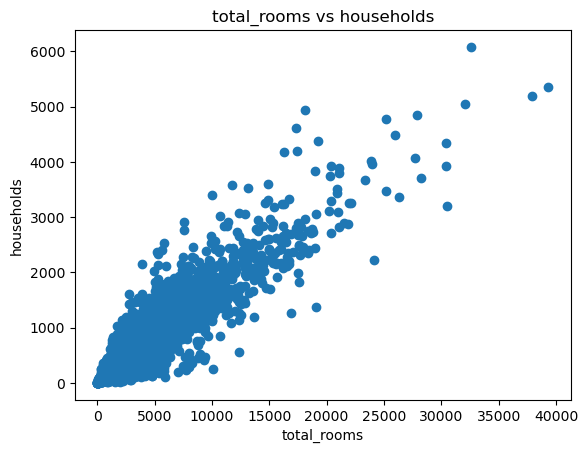

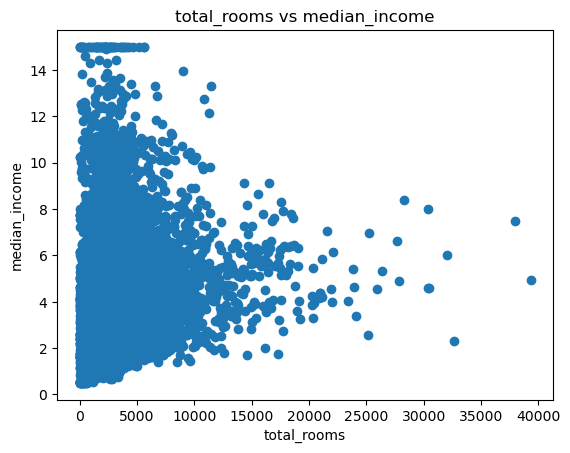

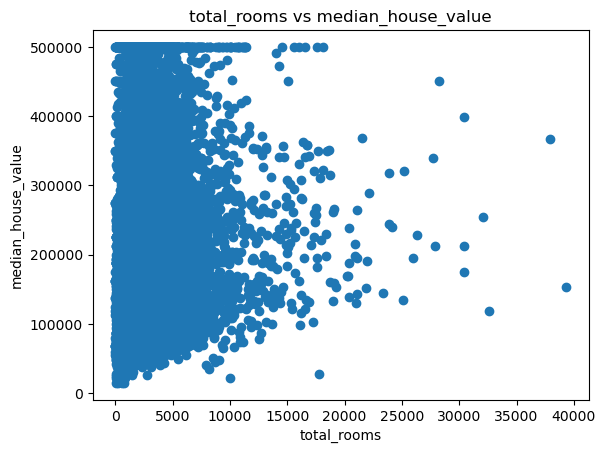

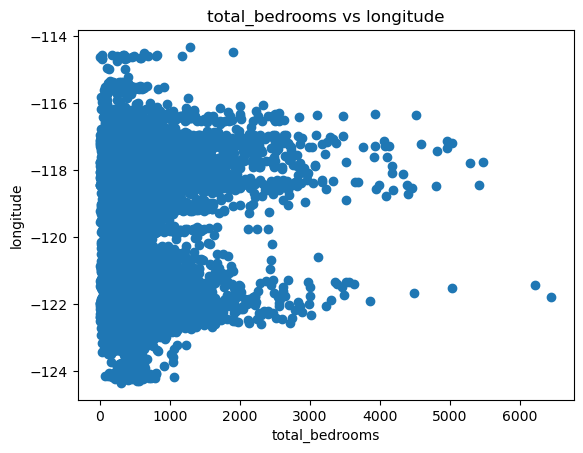

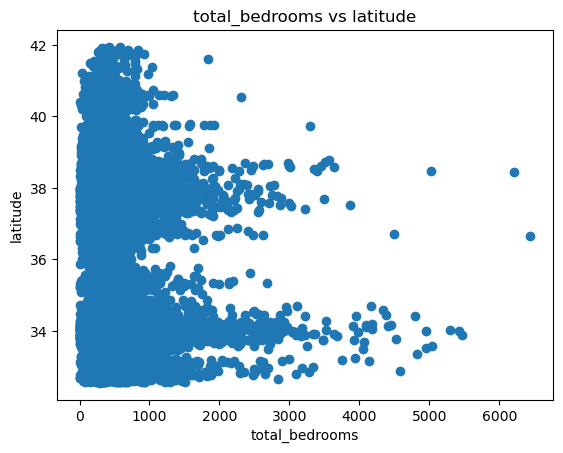

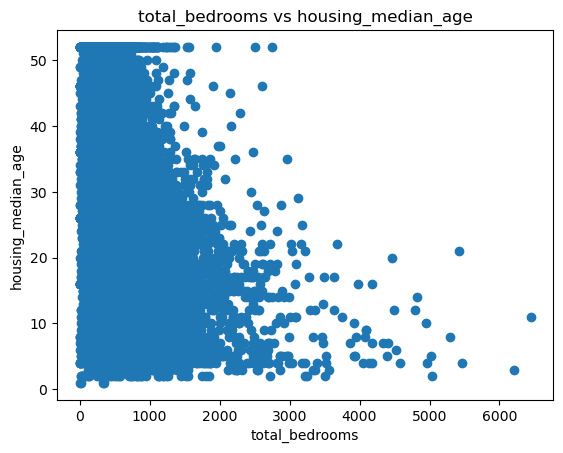

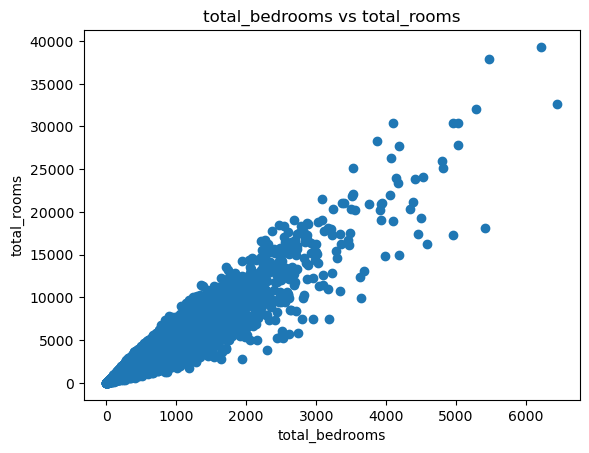

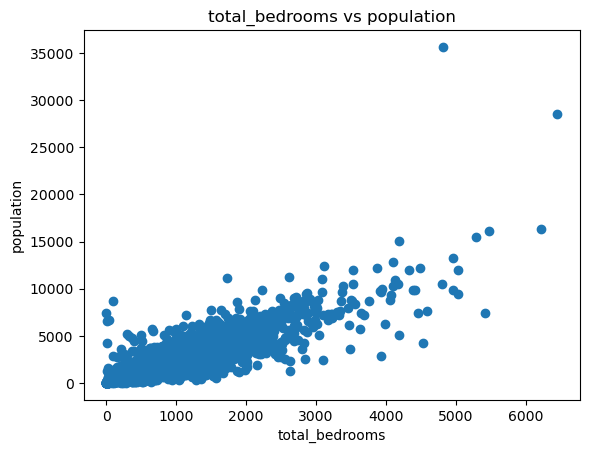

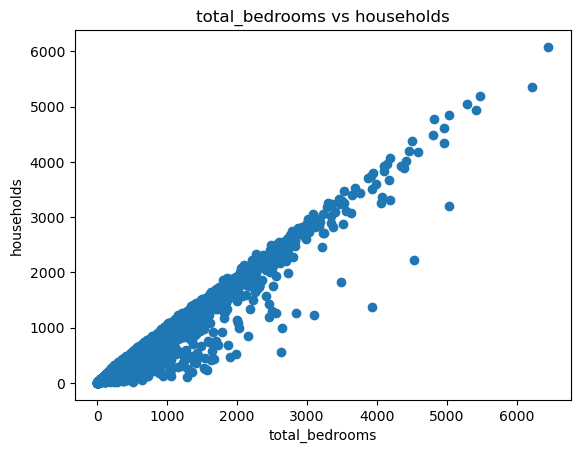

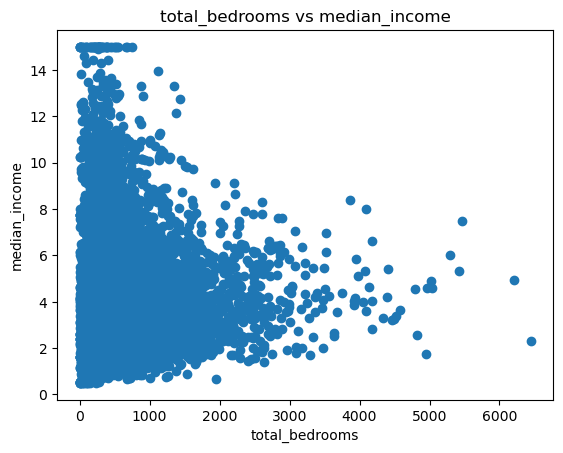

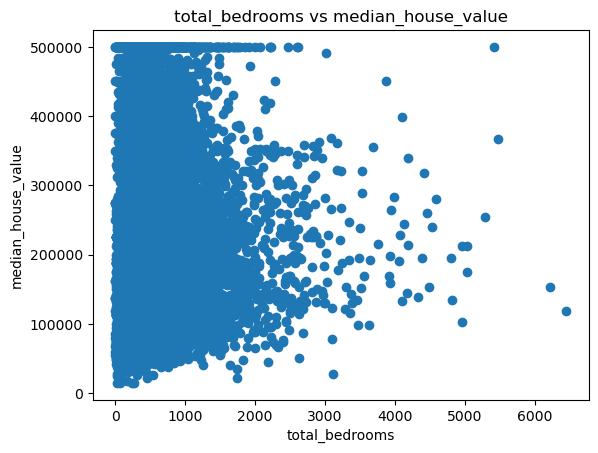

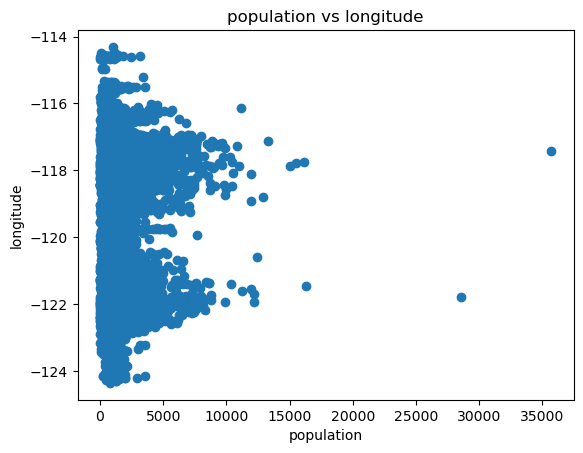

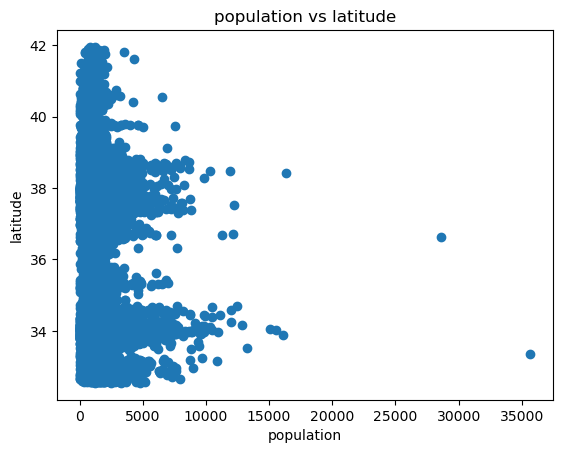

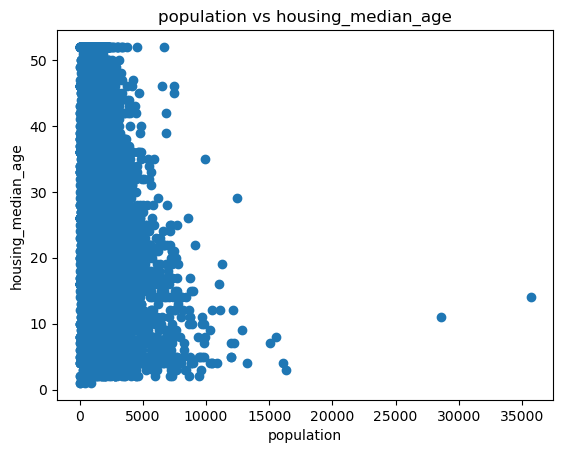

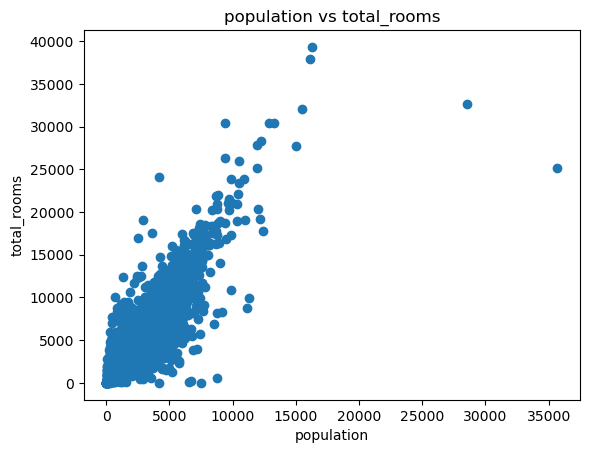

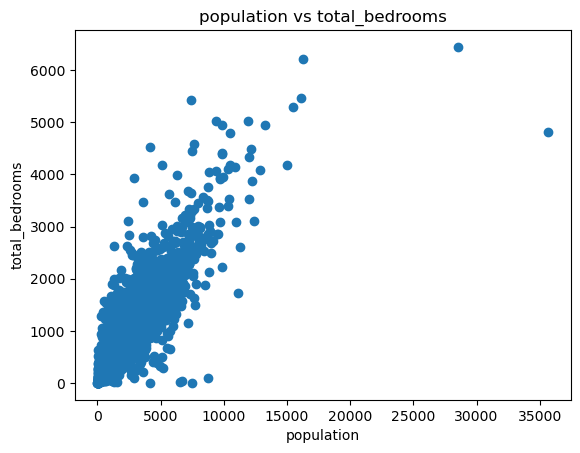

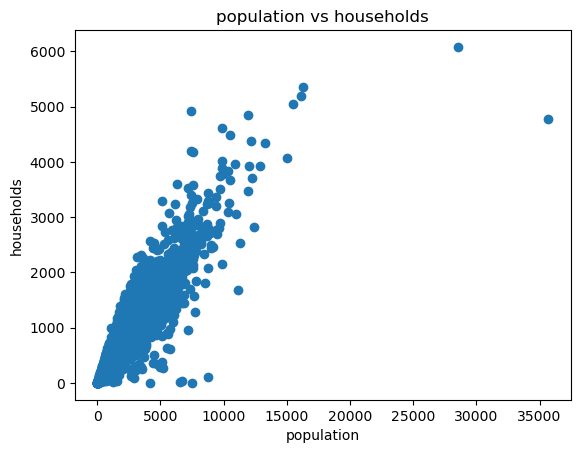

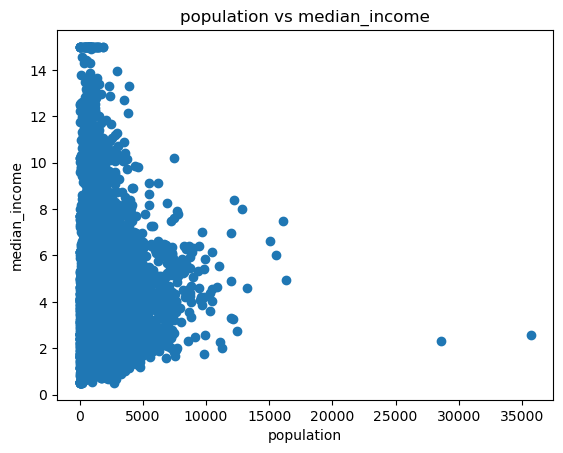

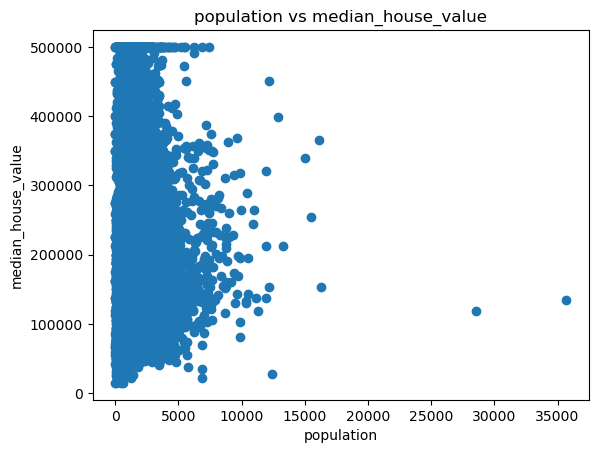

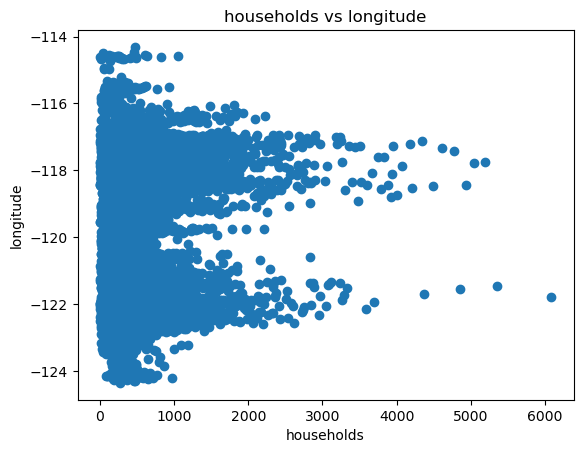

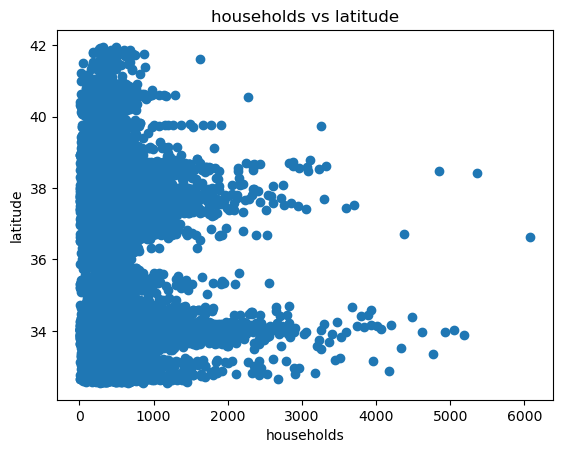

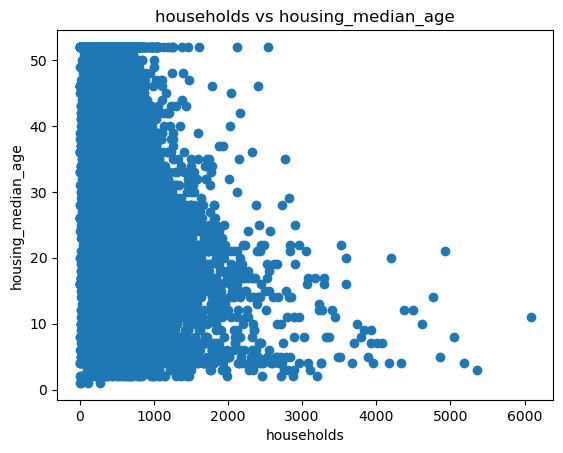

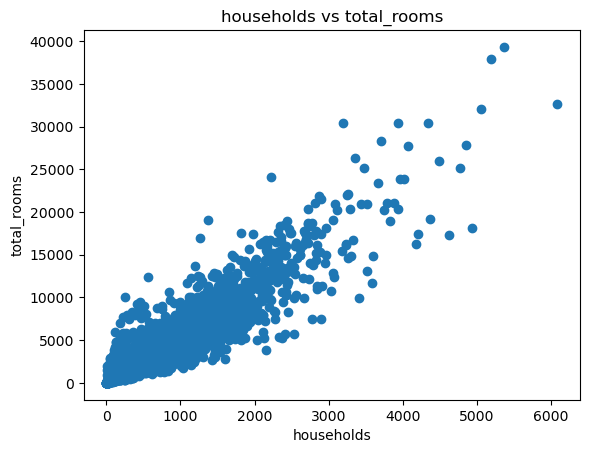

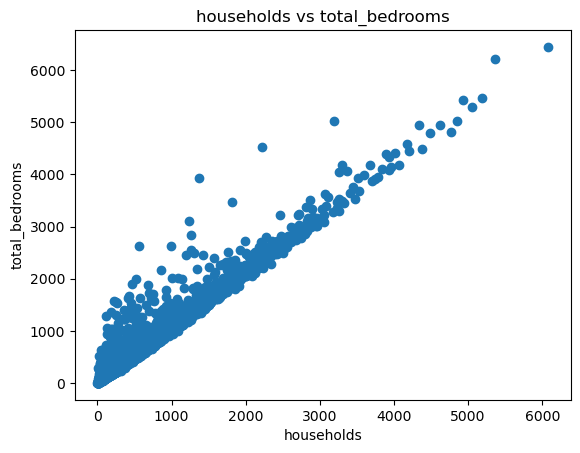

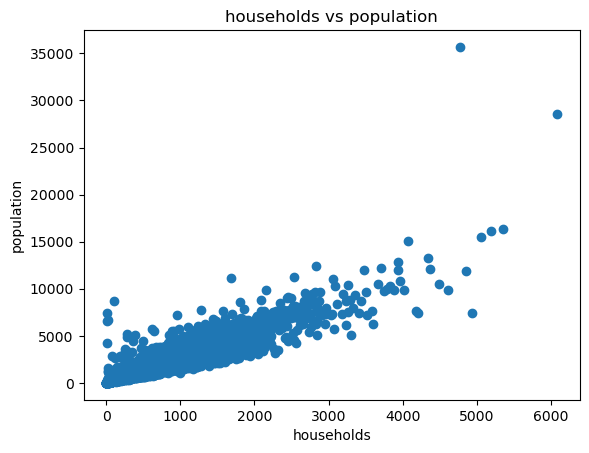

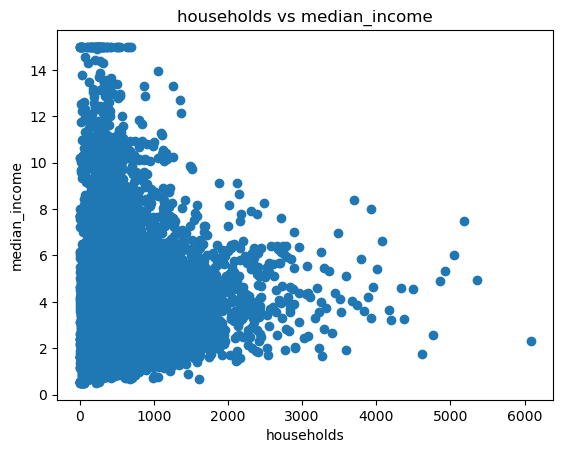

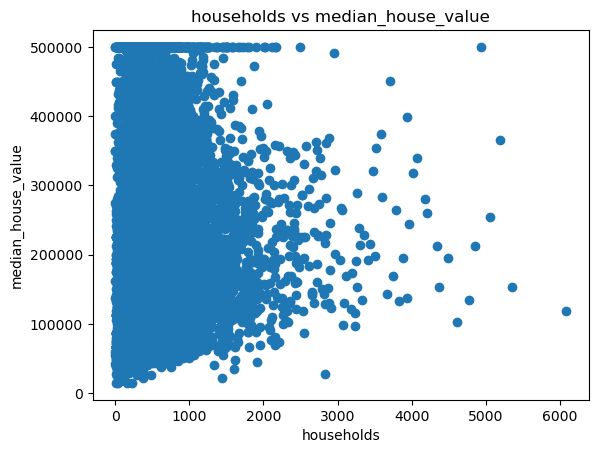

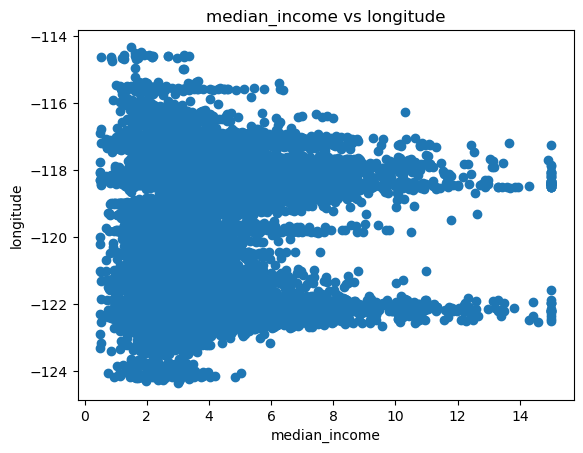

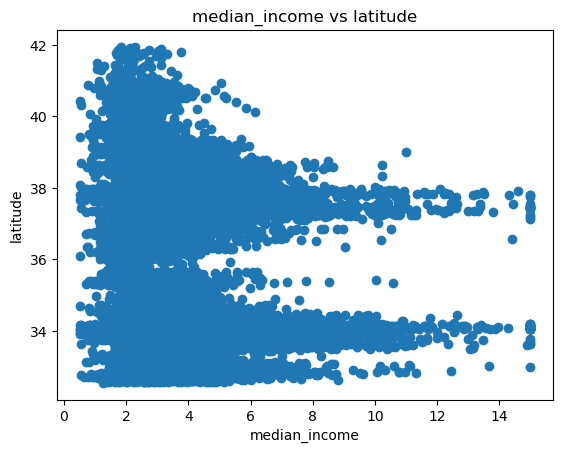

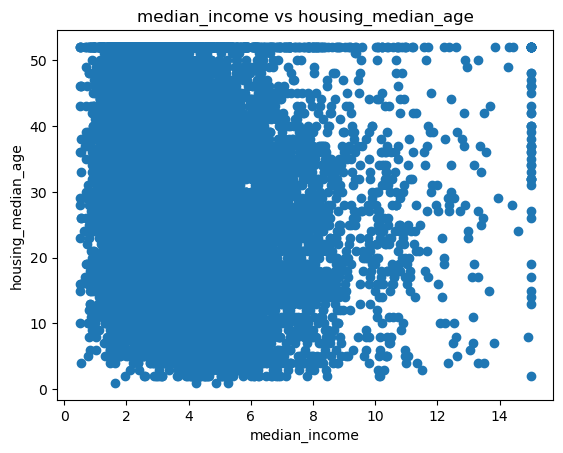

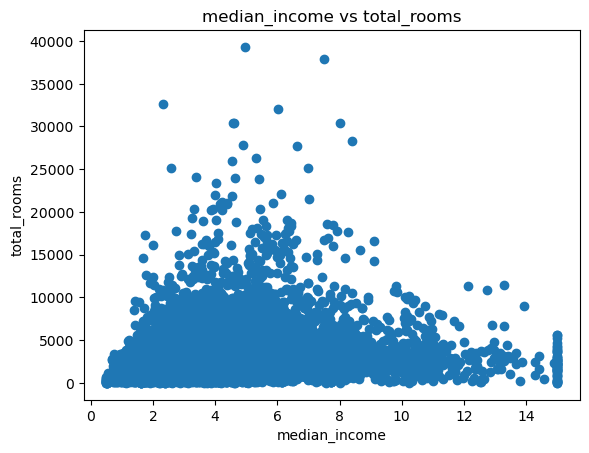

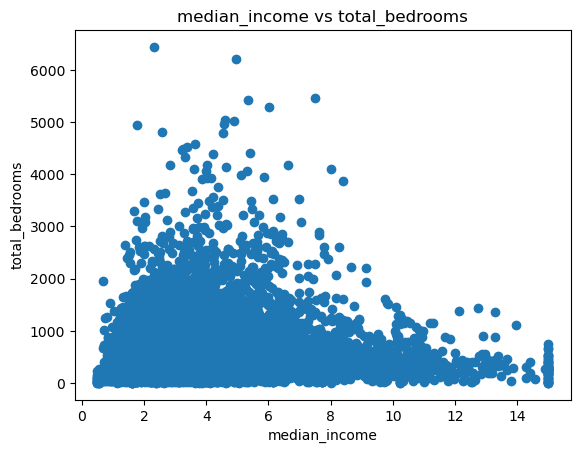

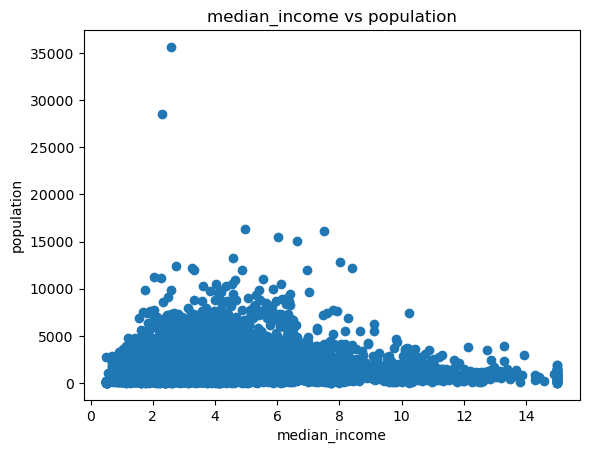

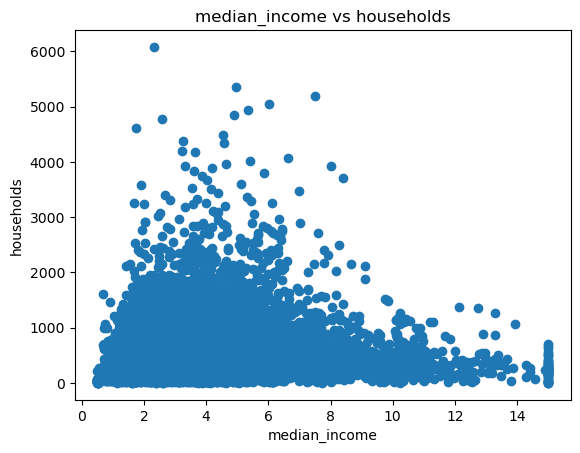

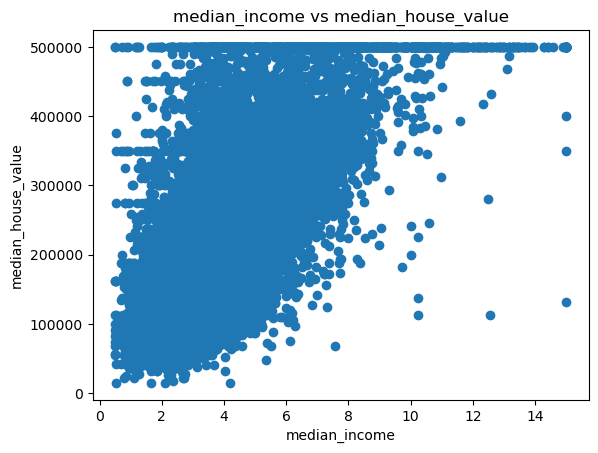

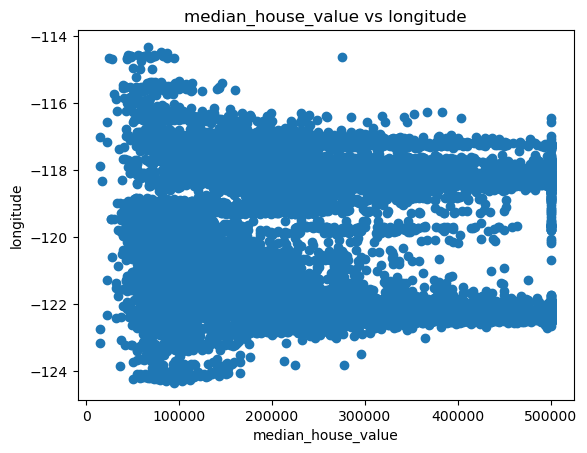

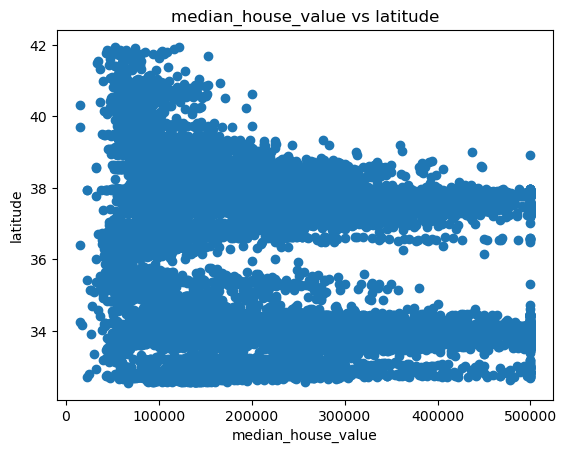

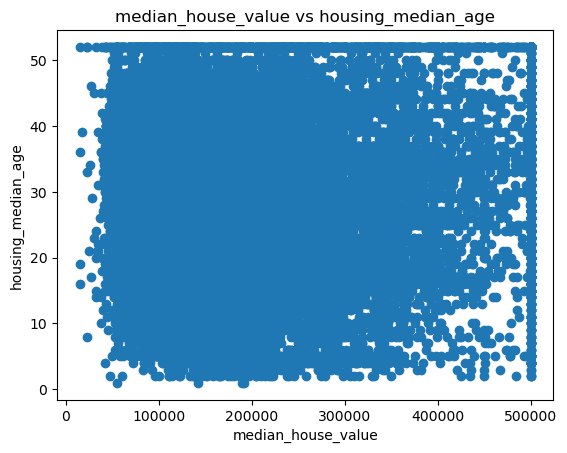

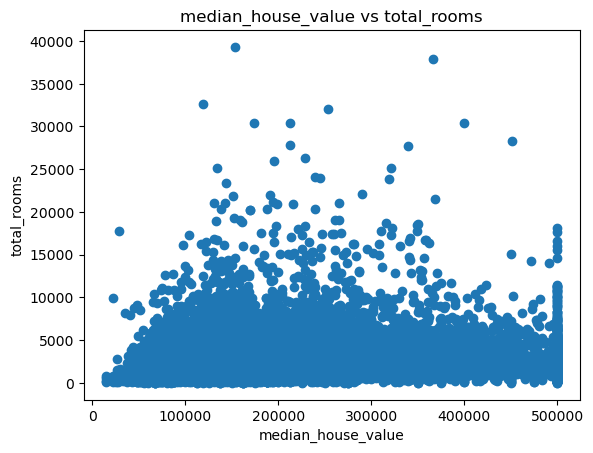

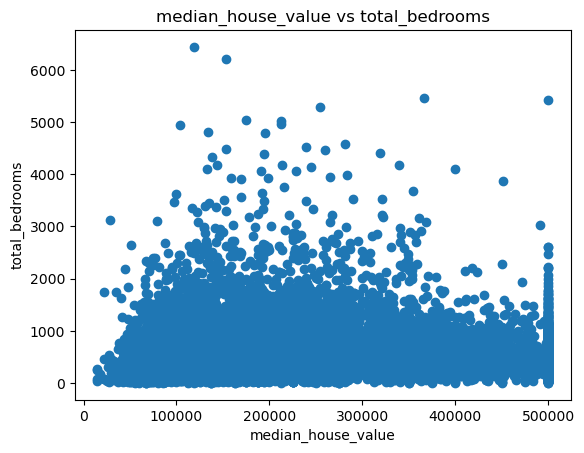

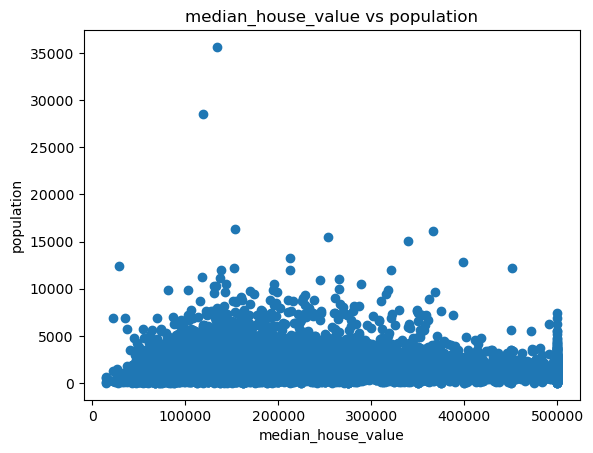

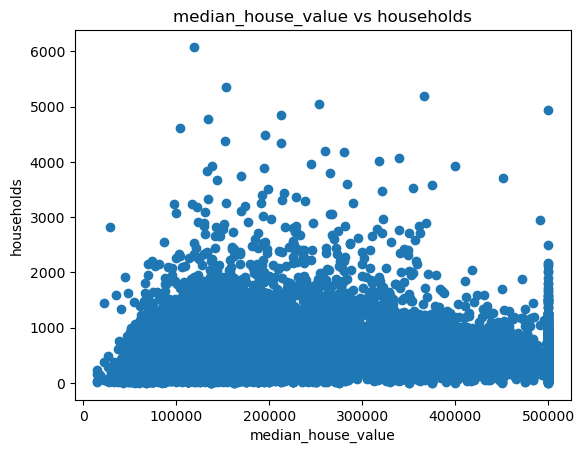

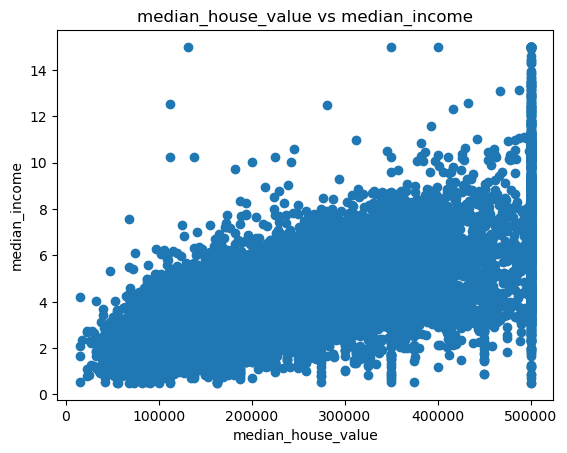

In [92]:
# 5. Create and compile as many graphs (feature vs target variable) as you can using
# the matplotlib library [https://matplotlib.org/gallery/index.html] for the given
# dataset. Select only numerical features.


# here's all possible combination of graphs we can have, 
# but only 6 pairs with high corr has linear relationship, 
columns = list(housing_df.columns)
columns = columns[0:-1]
for x in columns:
    for y in columns:
        if x != y:
            housing_plot(x, y)





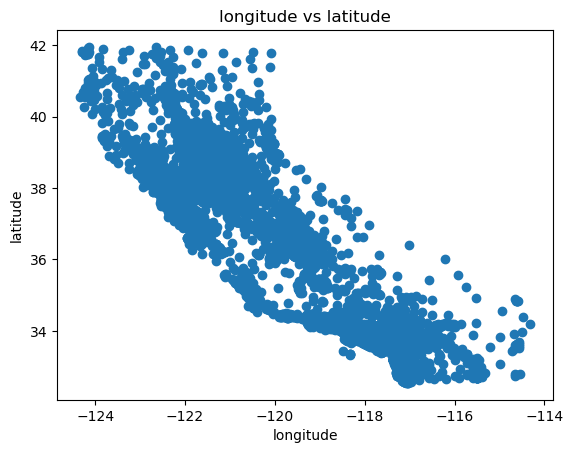

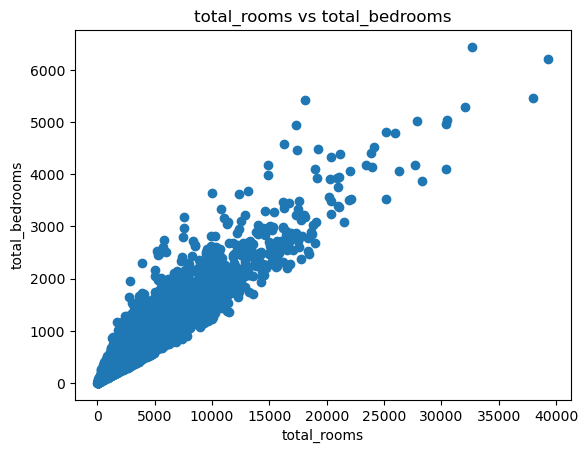

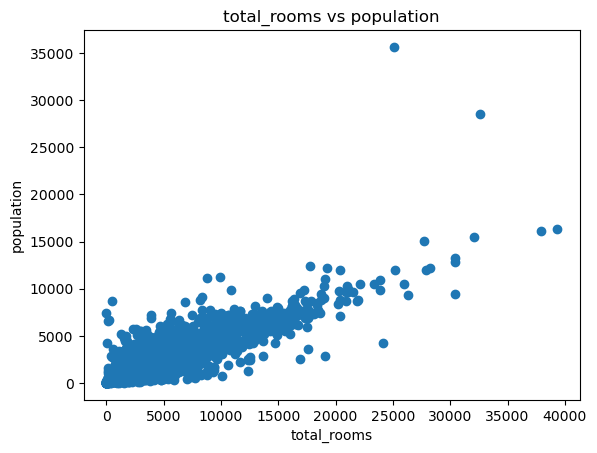

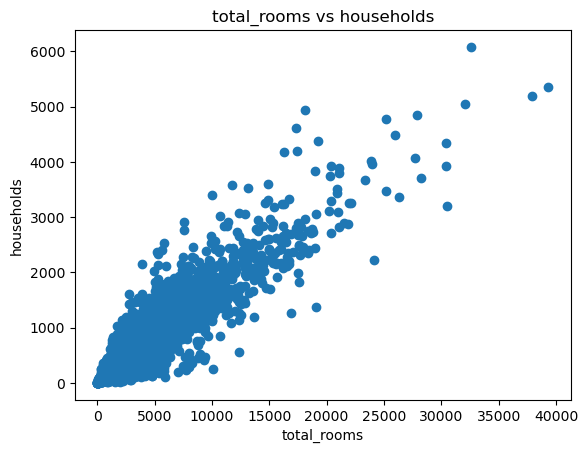

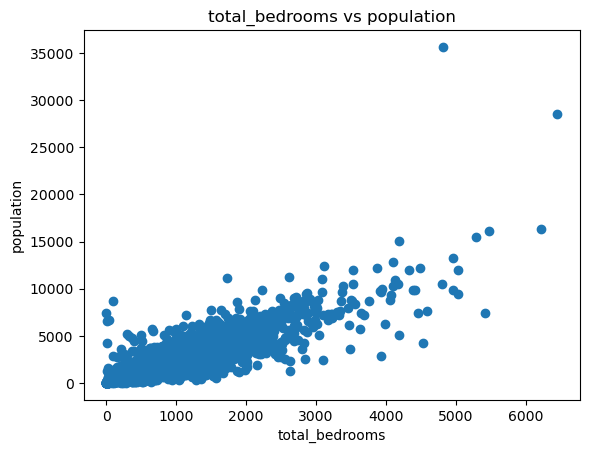

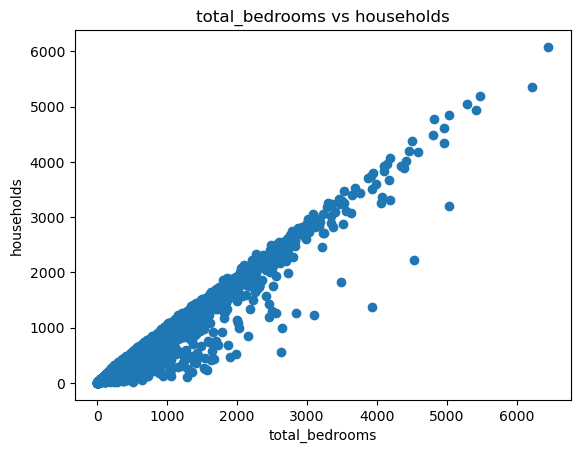

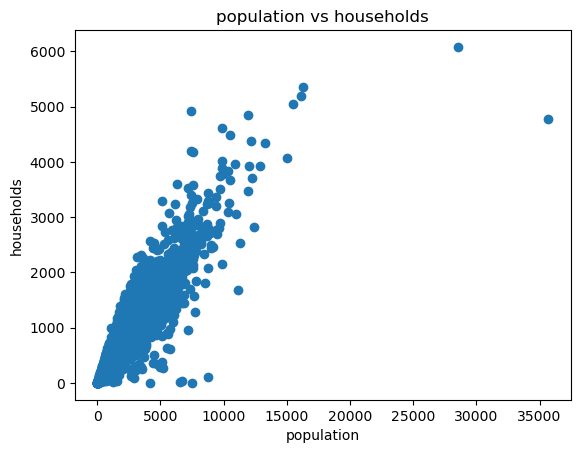

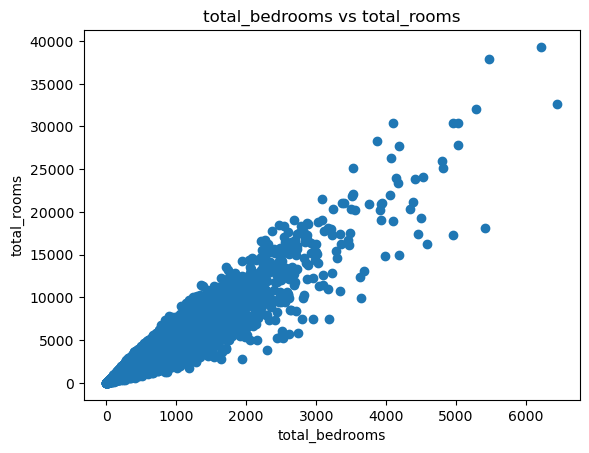

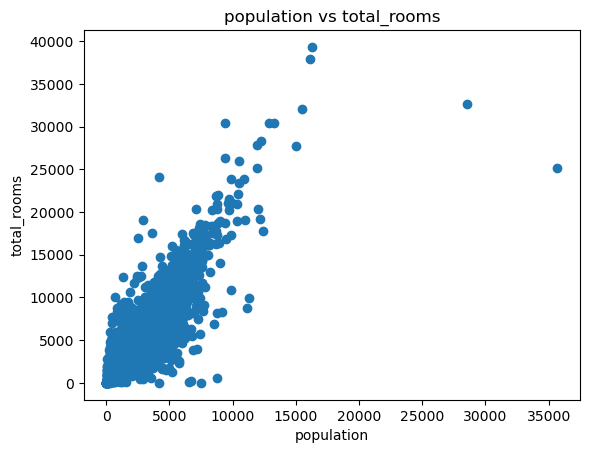

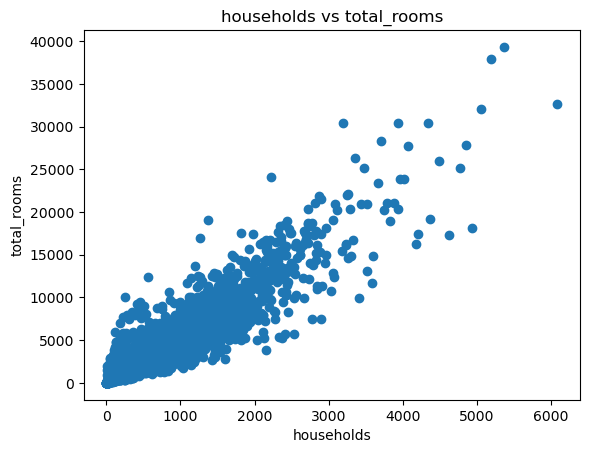

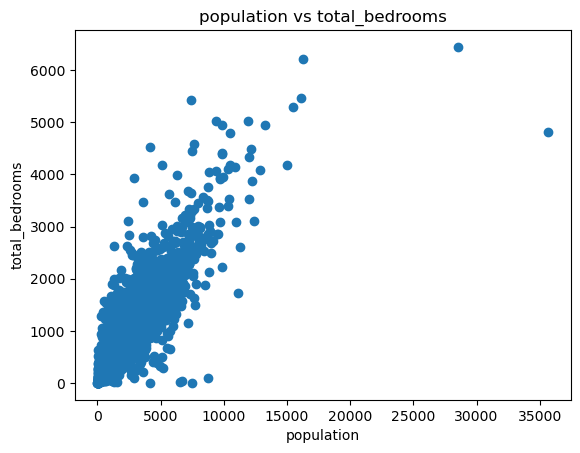

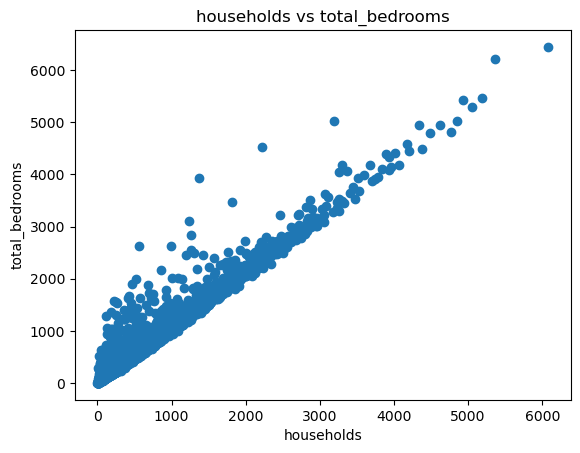

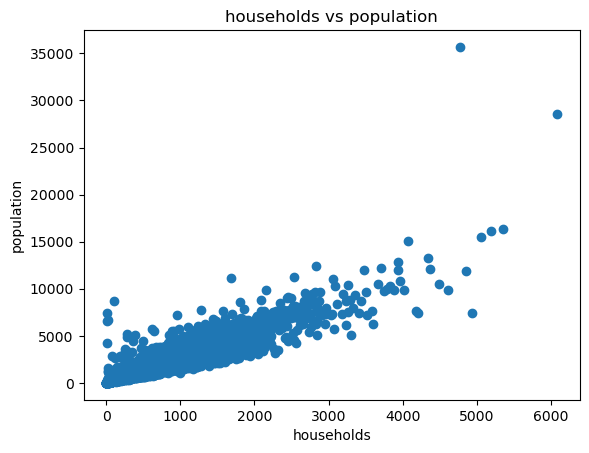

In [93]:
# 5. Continued
# here's the six pairs with high corr, and one for longitude&latitude

def housing_plot(x_val, y_val):
    plt.plot(housing_df[f'{x_val}'], housing_df[f'{y_val}'], 'o')
    plt.xlabel(f'{x_val}')
    plt.ylabel(f'{y_val}')
    plt.title(f'{x_val} vs {y_val}')
    plt.show()


housing_plot('longitude','latitude') # it seems fun to include this, like the shape of California

housing_plot('total_rooms','total_bedrooms')
housing_plot('total_rooms','population')
housing_plot('total_rooms','households')
housing_plot('total_bedrooms','population')
housing_plot('total_bedrooms','households')
housing_plot('population','households')

# and switching the feature and target
housing_plot('total_bedrooms', 'total_rooms')
housing_plot('population', 'total_rooms')
housing_plot('households', 'total_rooms')
housing_plot('population', 'total_bedrooms')
housing_plot('households', 'total_bedrooms')
housing_plot('households', 'population')



In [94]:
# 7. Selecting different features from step 6, implement a linear regression algorithm
# and find the slope, the intercept and the error of the regression model.


# function to plot in scatter plot and our prediction function
def housing_pred_plot(x_val, y_val, pred_y):
    plt.plot(housing_df[f'{x_val}'], housing_df[f'{y_val}'], 'o')
    plt.plot(housing_df[f'{x_val}'], pred_y, 'r', linewidth=2) 
    plt.xlabel(f'{x_val}')
    plt.ylabel(f'{y_val}')
    plt.title(f'{x_val} vs {y_val}')
    plt.show()

# linear regression on housing, input question(feature), and answer(target to predict)
def housing_linreg(questions, answers):
    
    X = housing_df[questions]
    y = housing_df[answers]

    lm = LinearRegression()
    model = lm.fit(X, y)

    print(f'intercept = {model.intercept_}')
    print(f'coefficient = {model.coef_}')

    
    pred_y = model.predict(X)

    if len(questions) == 1: # plot if only one parameter, only one feature
        housing_pred_plot(questions[0], answers, pred_y)
    

intercept = 46.89997601810228
coefficient = [4.82242124]


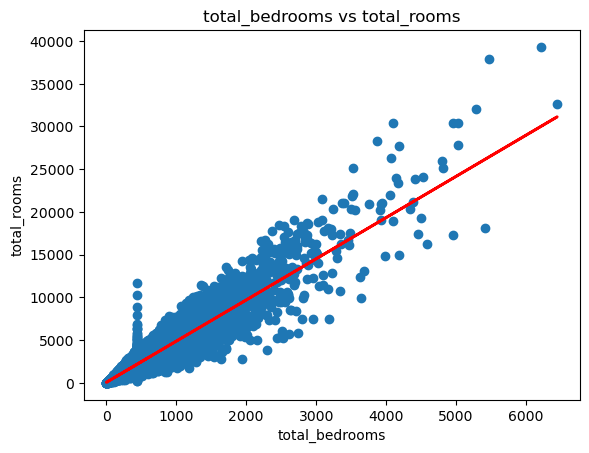

In [95]:
# feature: population
# target: total_rooms
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)
housing_linreg(['total_bedrooms'], 'total_rooms')

intercept = 282.01885268768046
coefficient = [1.65119792]


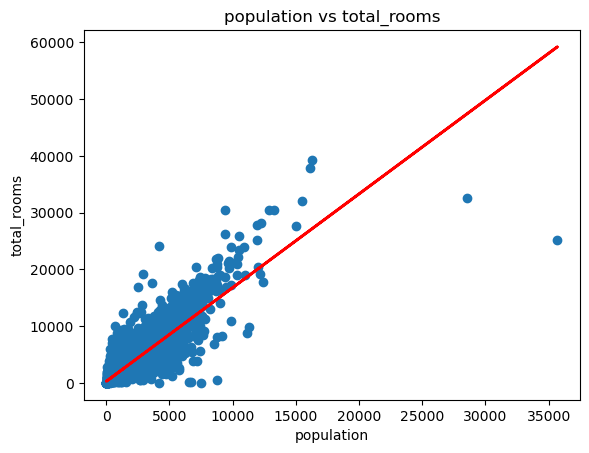

In [96]:
housing_linreg(['population'], 'total_rooms')

intercept = 17.689280170347047
coefficient = [5.24097265]


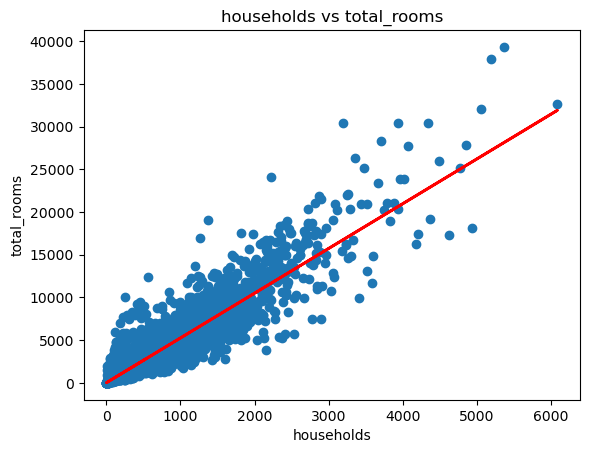

In [97]:
housing_linreg(['households'], 'total_rooms')


intercept = 75.69470115245974
coefficient = [0.3235017]


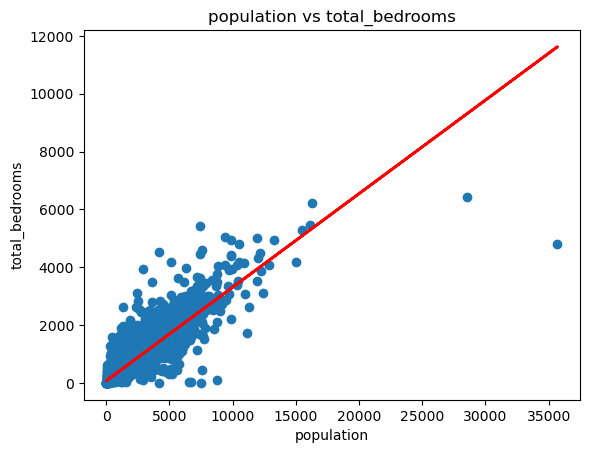

In [98]:
housing_linreg(['population'], 'total_bedrooms')


intercept = 2.9213477383798363
coefficient = [1.06881901]


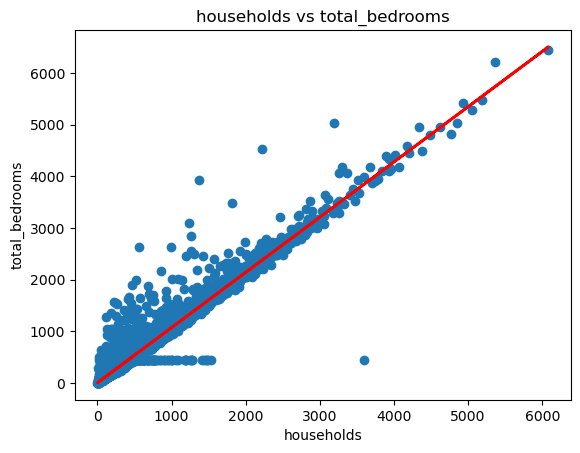

In [99]:
housing_linreg(['households'], 'total_bedrooms')


intercept = 83.11588362697034
coefficient = [2.68719566]


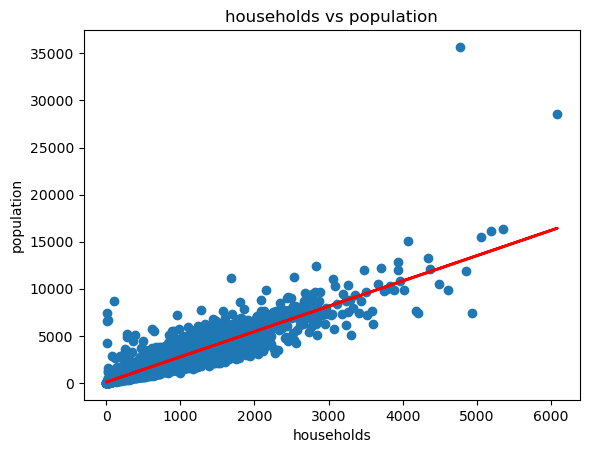

In [100]:
housing_linreg(['households'], 'population')
